<a href="https://colab.research.google.com/github/VARUN-THIRUNAGAR/Information-Extraction/blob/main/Information_Extraction_from_Educational_Certificates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Information Extraction From Educational Certifiecates**










In [1]:
!pip install pytesseract
!sudo apt install tesseract-ocr
!pip install pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,908 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

# Extracting text from images using OCR

In [4]:
# Import required libraries
from PIL import Image
import pytesseract
import json
import os

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Function to extract text from bounding boxes and store in a text file
def extract_text_and_save(image_id, image_path, json_path, output_folder):
    # Load the image using Pillow
    image = Image.open(image_path)

    # Load JSON data
    with open(json_path, 'r') as json_file:
        data = json.load(json_file)

    # Get the bounding boxes
    bounding_boxes = data.get(image_id, {}).get('regions', [])

    if not bounding_boxes:
        print(f"No bounding boxes found in the JSON file for {image_id}.")
        return

    # Extract text from each bounding box
    extracted_text = []
    for i, box in enumerate(bounding_boxes, 1):
        shape_attributes = box.get('shape_attributes', {})
        x, y, width, height = (
            shape_attributes.get('x', 0),
            shape_attributes.get('y', 0),
            shape_attributes.get('width', 0),
            shape_attributes.get('height', 0)
        )

        # Crop the image to the bounding box
        cropped_image = image.crop((x, y, x + width, y + height))

        # Perform OCR on the cropped image
        ocr_text = pytesseract.image_to_string(cropped_image)

        # Append the OCR result for each bounding box with a bounding box ID
        extracted_text.append(f"Bounding Box {i} - {ocr_text.strip()}")

    # Save the extracted text to a text file
    output_file = os.path.join(output_folder, f'{image_id[:-4]}.txt')
    os.makedirs(os.path.dirname(output_file), exist_ok=True)
    with open(output_file, 'w') as text_file:
        text_file.write("\n\n".join(extracted_text))
        print(f"Text extracted for {image_id} and saved to {output_file}")

# Specify the output folder
output_folder = '/content/temp'

# Example usage for 30 images
for i in range(1, 31):
    image_id = f'temp{i}.png'
    image_path = f'/content/drive/MyDrive/data_set/train/images/temp{i}.png'
    json_path = f'/content/drive/MyDrive/data_set/train/boxes/temp{i}.json'

    # Call the function with the specified image, JSON, and output folder paths
    extract_text_and_save(image_id, image_path, json_path, output_folder)


Text extracted for temp1.png and saved to /content/temp/temp1.txt
Text extracted for temp2.png and saved to /content/temp/temp2.txt
Text extracted for temp3.png and saved to /content/temp/temp3.txt
Text extracted for temp4.png and saved to /content/temp/temp4.txt
Text extracted for temp5.png and saved to /content/temp/temp5.txt
Text extracted for temp6.png and saved to /content/temp/temp6.txt
Text extracted for temp7.png and saved to /content/temp/temp7.txt
Text extracted for temp8.png and saved to /content/temp/temp8.txt
Text extracted for temp9.png and saved to /content/temp/temp9.txt
Text extracted for temp10.png and saved to /content/temp/temp10.txt
Text extracted for temp11.png and saved to /content/temp/temp11.txt
Text extracted for temp12.png and saved to /content/temp/temp12.txt
Text extracted for temp13.png and saved to /content/temp/temp13.txt
Text extracted for temp14.png and saved to /content/temp/temp14.txt
Text extracted for temp15.png and saved to /content/temp/temp15.tx

In [5]:
import os

# Define the directory path containing all the text files
directory_path = '/content/temp'  # Update with the actual directory path

# Define the output folder path
output_folder = '/content/output/'  # Update with the desired output folder path

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through each file from temp1.txt to temp30.txt
for i in range(1, 31):
    input_file_path = os.path.join(directory_path, f'temp{i}.txt')

    # Check if the input file exists
    if os.path.exists(input_file_path):
        # Read the text from the current file
        with open(input_file_path, 'r') as file:
            text_lines = file.readlines()

        # Extract the text after the hyphen in each line and combine
        extracted_text = ' '.join([line.split('-')[1].strip() for line in text_lines if '-' in line])

        # Define the output file path
        output_file_path = os.path.join(output_folder, f'output_temp{i}.txt')

        # Save the combined text to the output file
        with open(output_file_path, 'w') as file:
            file.write(extracted_text)

        print(f"Combined text from {input_file_path} saved to: {output_file_path}")
    else:
        print(f"File {input_file_path} not found.")


Combined text from /content/temp/temp1.txt saved to: /content/output/output_temp1.txt
Combined text from /content/temp/temp2.txt saved to: /content/output/output_temp2.txt
Combined text from /content/temp/temp3.txt saved to: /content/output/output_temp3.txt
Combined text from /content/temp/temp4.txt saved to: /content/output/output_temp4.txt
Combined text from /content/temp/temp5.txt saved to: /content/output/output_temp5.txt
Combined text from /content/temp/temp6.txt saved to: /content/output/output_temp6.txt
Combined text from /content/temp/temp7.txt saved to: /content/output/output_temp7.txt
Combined text from /content/temp/temp8.txt saved to: /content/output/output_temp8.txt
Combined text from /content/temp/temp9.txt saved to: /content/output/output_temp9.txt
Combined text from /content/temp/temp10.txt saved to: /content/output/output_temp10.txt
Combined text from /content/temp/temp11.txt saved to: /content/output/output_temp11.txt
Combined text from /content/temp/temp12.txt saved 

In [6]:
# Import required libraries
from PIL import Image
import pytesseract
import json
import os

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Function to extract text from bounding boxes and store in a text file
def extract_text_and_save(image_id, image_path, json_path, output_folder):
    # Load the image using Pillow
    image = Image.open(image_path)

    # Load JSON data
    with open(json_path, 'r') as json_file:
        data = json.load(json_file)

    # Get the bounding boxes
    bounding_boxes = data.get(image_id, {}).get('regions', [])

    if not bounding_boxes:
        print(f"No bounding boxes found in the JSON file for {image_id}.")
        return

    # Extract text from each bounding box
    extracted_text = []
    for i, box in enumerate(bounding_boxes, 1):
        shape_attributes = box.get('shape_attributes', {})
        x, y, width, height = (
            shape_attributes.get('x', 0),
            shape_attributes.get('y', 0),
            shape_attributes.get('width', 0),
            shape_attributes.get('height', 0)
        )

        # Crop the image to the bounding box
        cropped_image = image.crop((x, y, x + width, y + height))

        # Perform OCR on the cropped image
        ocr_text = pytesseract.image_to_string(cropped_image)

        # Append the OCR result for each bounding box with a bounding box ID
        extracted_text.append(f"Bounding Box {i} - {ocr_text.strip()}")

    # Save the extracted text to a text file
    output_file = os.path.join(output_folder, f'{image_id[:-4]}.txt')
    with open(output_file, 'w') as text_file:
        text_file.write("\n\n".join(extracted_text))
        print(f"Text extracted for {image_id} and saved to {output_file}")

# Specify the output folder
output_folder = '/content/temp'

# Example usage for 30 images
for i in range(31, 40):
    image_id = f'temp{i}.png'
    image_path = f'/content/drive/MyDrive/data_set/test/images/temp{i}.png'
    json_path = f'/content/drive/MyDrive/data_set/test/boxes/temp{i}.json'

    # Call the function with the specified image, JSON, and output folder paths
    extract_text_and_save(image_id, image_path, json_path, output_folder)


Text extracted for temp31.png and saved to /content/temp/temp31.txt
Text extracted for temp32.png and saved to /content/temp/temp32.txt
Text extracted for temp33.png and saved to /content/temp/temp33.txt
Text extracted for temp34.png and saved to /content/temp/temp34.txt
Text extracted for temp35.png and saved to /content/temp/temp35.txt
Text extracted for temp36.png and saved to /content/temp/temp36.txt
Text extracted for temp37.png and saved to /content/temp/temp37.txt
Text extracted for temp38.png and saved to /content/temp/temp38.txt
Text extracted for temp39.png and saved to /content/temp/temp39.txt


In [7]:
import os

# Define the directory path containing all the text files
directory_path = '/content/temp'  # Update with the actual directory path

# Define the output folder path
output_folder = '/content/output/'  # Update with the desired output folder path

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through each file from temp1.txt to temp30.txt
for i in range(31, 40):
    input_file_path = os.path.join(directory_path, f'temp{i}.txt')

    # Check if the input file exists
    if os.path.exists(input_file_path):
        # Read the text from the current file
        with open(input_file_path, 'r') as file:
            text_lines = file.readlines()

        # Extract the text after the hyphen in each line and combine
        extracted_text = ' '.join([line.split('-')[1].strip() for line in text_lines if '-' in line])

        # Define the output file path
        output_file_path = os.path.join(output_folder, f'output_temp{i}.txt')

        # Save the combined text to the output file
        with open(output_file_path, 'w') as file:
            file.write(extracted_text)

        print(f"Combined text from {input_file_path} saved to: {output_file_path}")
    else:
        print(f"File {input_file_path} not found.")


Combined text from /content/temp/temp31.txt saved to: /content/output/output_temp31.txt
Combined text from /content/temp/temp32.txt saved to: /content/output/output_temp32.txt
Combined text from /content/temp/temp33.txt saved to: /content/output/output_temp33.txt
Combined text from /content/temp/temp34.txt saved to: /content/output/output_temp34.txt
Combined text from /content/temp/temp35.txt saved to: /content/output/output_temp35.txt
Combined text from /content/temp/temp36.txt saved to: /content/output/output_temp36.txt
Combined text from /content/temp/temp37.txt saved to: /content/output/output_temp37.txt
Combined text from /content/temp/temp38.txt saved to: /content/output/output_temp38.txt
Combined text from /content/temp/temp39.txt saved to: /content/output/output_temp39.txt


#NER for Extracting key features

In [8]:
pip install spacy


# Fine-tuning Spacy NER model
  en_core_web_sm pre-trained model

In [9]:
import spacy
import random
from spacy.training.example import Example
import json
import os


In [10]:
# Load the pre-trained "en_core_web_sm" model
nlp = spacy.load("en_core_web_sm")

In [11]:
ner = nlp.get_pipe("ner")
for label in ["CERTIFIED THAT", "FATHER'S NAME", "MOTHER'S NAME", "ROLL NO.", "DATE OF BIRTH"]:
    ner.add_label(label)

In [12]:
# Your training data directory
training_data_dir = "/content/drive/MyDrive/data_set/train/entities"

In [13]:
# Training loop
epochs = 60
dropout_rate = 0.5

for epoch in range(epochs):
    all_losses = {}

    # Loop through each training file in the directory
    for filename in os.listdir(training_data_dir):
        if filename.endswith(".json"):
            file_path = os.path.join(training_data_dir, filename)

            # Load JSON file
            with open(file_path, "r", encoding="utf-8") as file:
                training_data = json.load(file)

            # Shuffle the list of annotations in the training data
            random.shuffle(training_data["annotations"])
            losses = {}

            # Process each example in the file
            for example in training_data["annotations"]:
                text = example[0]
                entities = example[1]["entities"]

                # Create a spaCy Doc object
                doc = nlp.make_doc(text)

                # Update the NER model with the example
                example = Example.from_dict(doc, {"entities": entities})
                nlp.update([example], drop=dropout_rate, losses=losses)

            # Print loss for each file
            avg_loss = losses.get("ner", 0.0)


            # Collect losses for all files
            all_losses.setdefault("ner", []).append(avg_loss)

    # Print average loss for the epoch
    avg_loss_all_files = sum(all_losses.get("ner", [])) / len(all_losses.get("ner", [])) if all_losses.get("ner") else 0
    print(f"Epoch {epoch + 1}, Avg. Loss (All Files): {avg_loss_all_files:.2f}")


Epoch 1, Avg. Loss (All Files): 11.66
Epoch 2, Avg. Loss (All Files): 8.16
Epoch 3, Avg. Loss (All Files): 10.14
Epoch 4, Avg. Loss (All Files): 13.50
Epoch 5, Avg. Loss (All Files): 16.03
Epoch 6, Avg. Loss (All Files): 5.08
Epoch 7, Avg. Loss (All Files): 4.42
Epoch 8, Avg. Loss (All Files): 21.74
Epoch 9, Avg. Loss (All Files): 26.06
Epoch 10, Avg. Loss (All Files): 6.03
Epoch 11, Avg. Loss (All Files): 6.43
Epoch 12, Avg. Loss (All Files): 5.15
Epoch 13, Avg. Loss (All Files): 4.73
Epoch 14, Avg. Loss (All Files): 3.79
Epoch 15, Avg. Loss (All Files): 3.90
Epoch 16, Avg. Loss (All Files): 3.00
Epoch 17, Avg. Loss (All Files): 3.00
Epoch 18, Avg. Loss (All Files): 2.87
Epoch 19, Avg. Loss (All Files): 3.11
Epoch 20, Avg. Loss (All Files): 2.78
Epoch 21, Avg. Loss (All Files): 2.42
Epoch 22, Avg. Loss (All Files): 2.11
Epoch 23, Avg. Loss (All Files): 1.65
Epoch 24, Avg. Loss (All Files): 1.63
Epoch 25, Avg. Loss (All Files): 1.86
Epoch 26, Avg. Loss (All Files): 1.26
Epoch 27, Avg. 

In [14]:
# Save the fine-tuned model
nlp.to_disk("/content/drive/MyDrive/model_sm")

In [15]:
import spacy
import os
import json

# Load your fine-tuned spaCy NER model
nlp = spacy.load("/content/drive/MyDrive/model_sm")  # Replace with the path where you saved your model

# Directory containing your text files
text_files_dir = "/content/drive/MyDrive/data_set/test/text"

# Loop through each text file in the directory
for filename in os.listdir(text_files_dir):
    if filename.endswith(".txt"):
        file_path = os.path.join(text_files_dir, filename)

        # Read the contents of the text file
        with open(file_path, "r", encoding="utf-8") as file:
            test_text = file.read()

        # Process the test text with the NER model
        doc = nlp(test_text)

        # Extract entities from the processed text
        entities = [{"start": ent.start_char, "end": ent.end_char, "label": ent.label_, "text": ent.text} for ent in doc.ents]

        # Print the extracted entities with text
        print(f"\nFile: {filename}")
        print("Extracted Entities:")
        for entity in entities:
            print(f"Label: {entity['label']}, Text: {entity['text']}, Start: {entity['start']}, End: {entity['end']}")



File: temp31.txt
Extracted Entities:
Label: CERTIFIED THAT, Text: EMMADI GANESH REDDY, Start: 15, End: 34
Label: FATHER'S NAME, Text: EMMADI GOPAL REDDY, Start: 49, End: 67
Label: MOTHER'S NAME, Text: EMMADI JYOTHI, Start: 82, End: 95
Label: ROLL NO., Text: 1818111414, Start: 105, End: 115
Label: DATE OF BIRTH, Text: 24/07/2001, Start: 130, End: 140

File: temp32.txt
Extracted Entities:
Label: CERTIFIED THAT, Text: AKULA SHIVA, Start: 15, End: 26
Label: FATHER'S NAME, Text: KISHTAIAH MOTHER, Start: 41, End: 57
Label: FATHER'S NAME, Text: VASANTHA  , Start: 65, End: 75
Label: ROLL NO., Text: 1813109222, Start: 75, End: 85
Label: DATE OF BIRTH, Text: 26/11/2002, Start: 99, End: 109

File: temp33.txt
Extracted Entities:
Label: CERTIFIED THAT, Text: CERTIFI ANTHIREDDYGARI SIDDARTHA REDDY, Start: 0, End: 38
Label: FATHER'S NAME, Text: ANTHIREDDYGARI RAM REDDY, Start: 53, End: 77
Label: MOTHER'S NAME, Text: ANTHIREDDYGARI SARALA, Start: 92, End: 113
Label: ROLL NO., Text: 4821121739, Start:

In [16]:
import spacy
import json
import os
from sklearn.metrics import precision_score, recall_score, f1_score

# Load your fine-tuned spaCy NER model
nlp = spacy.load("/content/drive/MyDrive/model_sm")  # Replace with the path where you saved your model

# Specify the directory containing your evaluation data files
evaluation_data_dir = "/content/drive/MyDrive/data_set/test/entities"

# Initialize lists to store metrics for each file
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through each evaluation data file in the directory
for filename in os.listdir(evaluation_data_dir):
    if filename.endswith(".json"):
        file_path = os.path.join(evaluation_data_dir, filename)

        # Load the evaluation data
        with open(file_path, "r", encoding="utf-8") as file:
            evaluation_data = json.load(file)

        # Initialize lists to store predicted and expected entities
        predicted_entities_all_files = []
        expected_entities_all_files = []

        # Process each example in the evaluation data
        for example in evaluation_data["annotations"]:
            text = example[0]
            expected_entities = example[1]["entities"]

            # Process the text with the NER model
            doc = nlp(text)
            predicted_entities = [{"start": ent.start_char, "end": ent.end_char, "label": ent.label_} for ent in doc.ents]

            # Create a set of unique expected entities
            unique_expected_entities = set((ent[0], ent[1], ent[2]) for ent in expected_entities)

            # Create a dictionary to store the most accurate predicted entity for each expected entity
            entity_to_prediction = {}

            # Update the dictionary with the most accurate prediction for each expected entity
            for predicted_entity in predicted_entities:
                key = (predicted_entity["start"], predicted_entity["end"], predicted_entity["label"])
                if key not in entity_to_prediction or (predicted_entity["start"] != -1 and entity_to_prediction[key]["start"] == -1):
                    entity_to_prediction[key] = predicted_entity

            # Check if each expected entity has a corresponding predicted entity
            for expected_entity in unique_expected_entities:
                if expected_entity not in entity_to_prediction:
                    # If missing, add a placeholder entry
                    entity_to_prediction[expected_entity] = {"start": -1, "end": -1, "label": "NOT_PREDICTED"}

            # Append predicted and expected entities to the lists
            predicted_entities_all_files.extend(list(entity_to_prediction.values()))
            expected_entities_all_files.extend(expected_entities)

        # Flatten the lists of entities for sklearn metrics
        flat_predicted_entities = [ent["label"] for ent in predicted_entities_all_files if ent["label"] != "NOT_PREDICTED"]
        flat_expected_entities = [ent[2] for ent in expected_entities_all_files]

        # Check if both lists have the same length, pad if necessary
        if len(flat_predicted_entities) < len(flat_expected_entities):
            flat_predicted_entities += ["NOT_PREDICTED"] * (len(flat_expected_entities) - len(flat_predicted_entities))
        elif len(flat_predicted_entities) > len(flat_expected_entities):
            flat_expected_entities += ["NOT_PREDICTED"] * (len(flat_predicted_entities) - len(flat_expected_entities))

        # Calculate precision, recall, and F1 score for the current file
        precision = precision_score(
            flat_expected_entities,
            flat_predicted_entities,
            average="weighted",
            zero_division=1
        )
        recall = recall_score(flat_expected_entities, flat_predicted_entities, average="weighted")
        f1 = f1_score(flat_expected_entities, flat_predicted_entities, average="weighted")

        # Print or store the metrics for the current file


        # Append metrics to the lists
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

# Calculate and print average metrics across all files
avg_precision = sum(precision_scores) / len(precision_scores) if precision_scores else 0
avg_recall = sum(recall_scores) / len(recall_scores) if recall_scores else 0
avg_f1 = sum(f1_scores) / len(f1_scores) if f1_scores else 0

print("\nAverage Metrics Across All Files:")
print(f"Average Precision: {avg_precision:.4f}, Average Recall: {avg_recall:.4f}, Average F1 Score: {avg_f1:.4f}")



Average Metrics Across All Files:
Average Precision: 0.9778, Average Recall: 0.9556, Average F1 Score: 0.9407


<ipython-input-17-c9f55a6ed7f2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


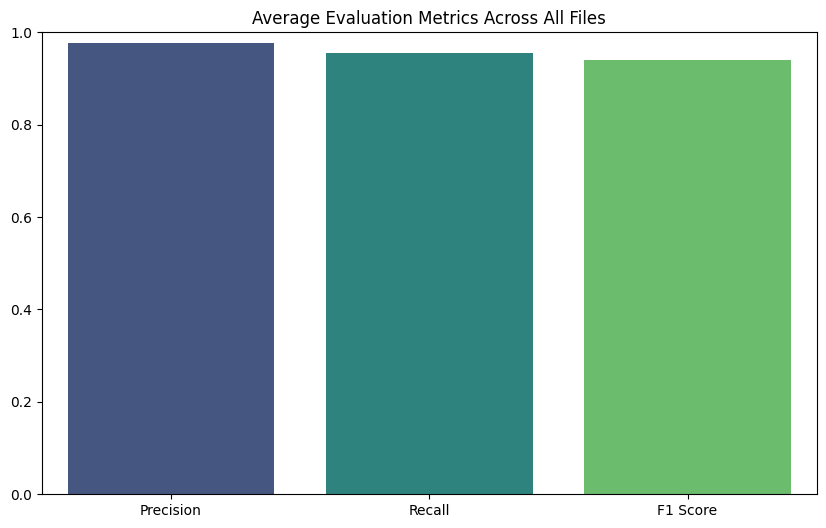

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for precision, recall, and F1 score
metrics = ['Precision', 'Recall', 'F1 Score']
values = [avg_precision, avg_recall, avg_f1]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Average Evaluation Metrics Across All Files')
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1 for precision, recall, and F1 score
plt.show()


#Fine-tuning en_core_web_md pre-trained model

In [18]:
!pip install spacy
!python -m spacy download en_core_web_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 16.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [19]:
import spacy
import random
from spacy.training.example import Example
import json
import os


In [20]:
# Load the pre-trained "en_core_web_md" model
nlp = spacy.load("en_core_web_md")


In [21]:
ner = nlp.get_pipe("ner")
for label in ["CERTIFIED THAT", "FATHER'S NAME", "MOTHER'S NAME", "ROLL NO.", "DATE OF BIRTH"]:
    ner.add_label(label)

In [22]:
# Your training data directory
training_data_dir = "/content/drive/MyDrive/data_set/train/entities"

In [ ]:
# Training loop
epochs = 60
dropout_rate = 0.5

for epoch in range(epochs):
    all_losses = {}

    # Loop through each training file in the directory
    for filename in os.listdir(training_data_dir):
        if filename.endswith(".json"):
            file_path = os.path.join(training_data_dir, filename)

            # Load JSON file
            with open(file_path, "r", encoding="utf-8") as file:
                training_data = json.load(file)

            # Shuffle the list of annotations in the training data
            random.shuffle(training_data["annotations"])
            losses = {}

            # Process each example in the file
            for example in training_data["annotations"]:
                text = example[0]
                entities = example[1]["entities"]

                # Create a spaCy Doc object
                doc = nlp.make_doc(text)

                # Update the NER model with the example
                example = Example.from_dict(doc, {"entities": entities})
                nlp.update([example], drop=dropout_rate, losses=losses)

            # Print loss for each file
            avg_loss = losses.get("ner", 0.0)


            # Collect losses for all files
            all_losses.setdefault("ner", []).append(avg_loss)

    # Print average loss for the epoch
    avg_loss_all_files = sum(all_losses.get("ner", [])) / len(all_losses.get("ner", [])) if all_losses.get("ner") else 0
    print(f"Epoch {epoch + 1}, Avg. Loss (All Files): {avg_loss_all_files:.2f}")


In [24]:
# Save the fine-tuned model
nlp.to_disk("/content/drive/MyDrive/model_md")

In [ ]:
import spacy
import os
import json

# Load your fine-tuned spaCy NER model
nlp = spacy.load("/content/drive/MyDrive/model_md")  # Replace with the path where you saved your model

# Directory containing your text files
text_files_dir = "/content/drive/MyDrive/data_set/test/text"

# Loop through each text file in the directory
for filename in os.listdir(text_files_dir):
    if filename.endswith(".txt"):
        file_path = os.path.join(text_files_dir, filename)

        # Read the contents of the text file
        with open(file_path, "r", encoding="utf-8") as file:
            test_text = file.read()

        # Process the test text with the NER model
        doc = nlp(test_text)

        # Extract entities from the processed text
        entities = [{"start": ent.start_char, "end": ent.end_char, "label": ent.label_, "text": ent.text} for ent in doc.ents]

        # Print the extracted entities with text
        print(f"\nFile: {filename}")
        print("Extracted Entities:")
        for entity in entities:
            print(f"Label: {entity['label']}, Text: {entity['text']}, Start: {entity['start']}, End: {entity['end']}")



File: temp32.txt
Extracted Entities:
Label: CERTIFIED THAT, Text: AKULA SHIVA, Start: 15, End: 26
Label: FATHER'S NAME, Text: KISHTAIAH MOTHER, Start: 41, End: 57
Label: ROLL NO., Text: 1813109222, Start: 75, End: 85
Label: DATE OF BIRTH, Text: 26/11/2002, Start: 99, End: 109

File: temp37.txt
Extracted Entities:
Label: CERTIFIED THAT, Text: KATUKU ADITHYA, Start: 15, End: 29
Label: FATHER'S NAME, Text: KATUKU SARAIAH, Start: 44, End: 58
Label: MOTHER'S NAME, Text: KATUKU SATHYAVATHT, Start: 73, End: 91
Label: ROLL NO., Text: 1808103923, Start: 101, End: 111
Label: DATE OF BIRTH, Text: 23/10/2002, Start: 126, End: 136

File: temp38.txt
Extracted Entities:
Label: CERTIFIED THAT, Text: YENUGU ARUN REDDY, Start: 15, End: 32
Label: FATHER'S NAME, Text: YENUGU LAKPATHI REDDY., Start: 47, End: 69
Label: MOTHER'S NAME, Text: YENUGU LAXMI, Start: 85, End: 97
Label: ROLL NO., Text: 2105123069, Start: 107, End: 117
Label: DATE OF BIRTH, Text: 07/09/2004, Start: 132, End: 142

File: temp35.txt
E

In [ ]:
import spacy
import json
import os
from sklearn.metrics import precision_score, recall_score, f1_score

# Load your fine-tuned spaCy NER model
nlp = spacy.load("/content/drive/MyDrive/model_md")  # Replace with the path where you saved your model

# Specify the directory containing your evaluation data files
evaluation_data_dir = "/content/drive/MyDrive/data_set/test/entities"

# Initialize lists to store metrics for each file
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through each evaluation data file in the directory
for filename in os.listdir(evaluation_data_dir):
    if filename.endswith(".json"):
        file_path = os.path.join(evaluation_data_dir, filename)

        # Load the evaluation data
        with open(file_path, "r", encoding="utf-8") as file:
            evaluation_data = json.load(file)

        # Initialize lists to store predicted and expected entities
        predicted_entities_all_files = []
        expected_entities_all_files = []

        # Process each example in the evaluation data
        for example in evaluation_data["annotations"]:
            text = example[0]
            expected_entities = example[1]["entities"]

            # Process the text with the NER model
            doc = nlp(text)
            predicted_entities = [{"start": ent.start_char, "end": ent.end_char, "label": ent.label_} for ent in doc.ents]

            # Create a set of unique expected entities
            unique_expected_entities = set((ent[0], ent[1], ent[2]) for ent in expected_entities)

            # Create a dictionary to store the most accurate predicted entity for each expected entity
            entity_to_prediction = {}

            # Update the dictionary with the most accurate prediction for each expected entity
            for predicted_entity in predicted_entities:
                key = (predicted_entity["start"], predicted_entity["end"], predicted_entity["label"])
                if key not in entity_to_prediction or (predicted_entity["start"] != -1 and entity_to_prediction[key]["start"] == -1):
                    entity_to_prediction[key] = predicted_entity

            # Check if each expected entity has a corresponding predicted entity
            for expected_entity in unique_expected_entities:
                if expected_entity not in entity_to_prediction:
                    # If missing, add a placeholder entry
                    entity_to_prediction[expected_entity] = {"start": -1, "end": -1, "label": "NOT_PREDICTED"}

            # Append predicted and expected entities to the lists
            predicted_entities_all_files.extend(list(entity_to_prediction.values()))
            expected_entities_all_files.extend(expected_entities)

        # Flatten the lists of entities for sklearn metrics
        flat_predicted_entities = [ent["label"] for ent in predicted_entities_all_files if ent["label"] != "NOT_PREDICTED"]
        flat_expected_entities = [ent[2] for ent in expected_entities_all_files]

        # Check if both lists have the same length, pad if necessary
        if len(flat_predicted_entities) < len(flat_expected_entities):
            flat_predicted_entities += ["NOT_PREDICTED"] * (len(flat_expected_entities) - len(flat_predicted_entities))
        elif len(flat_predicted_entities) > len(flat_expected_entities):
            flat_expected_entities += ["NOT_PREDICTED"] * (len(flat_predicted_entities) - len(flat_expected_entities))

        # Calculate precision, recall, and F1 score for the current file
        precision = precision_score(
            flat_expected_entities,
            flat_predicted_entities,
            average="weighted",
            zero_division=1
        )
        recall = recall_score(flat_expected_entities, flat_predicted_entities, average="weighted")
        f1 = f1_score(flat_expected_entities, flat_predicted_entities, average="weighted")

        # Print or store the metrics for the current file


        # Append metrics to the lists
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

# Calculate and print average metrics across all files
avg_precision = sum(precision_scores) / len(precision_scores) if precision_scores else 0
avg_recall = sum(recall_scores) / len(recall_scores) if recall_scores else 0
avg_f1 = sum(f1_scores) / len(f1_scores) if f1_scores else 0

print("\nAverage Metrics Across All Files:")
print(f"Average Precision: {avg_precision:.4f}, Average Recall: {avg_recall:.4f}, Average F1 Score: {avg_f1:.4f}")



Average Metrics Across All Files:
Average Precision: 0.9667, Average Recall: 0.9333, Average F1 Score: 0.9111


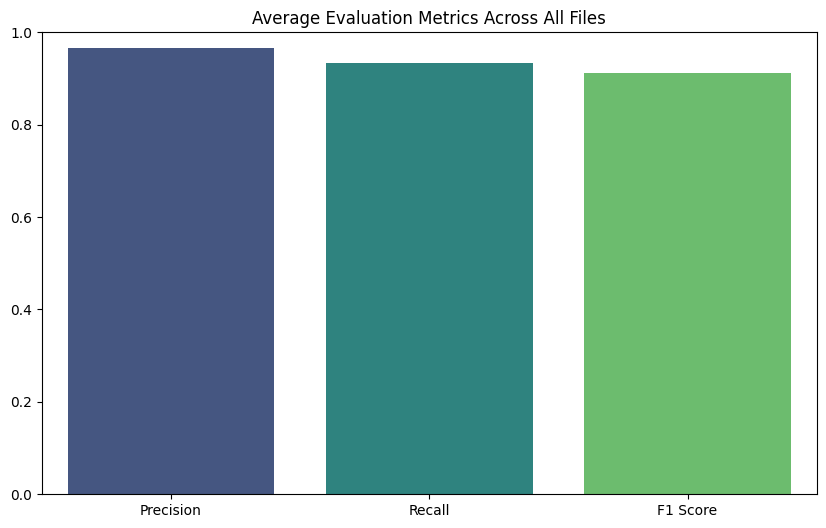

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for precision, recall, and F1 score
metrics = ['Precision', 'Recall', 'F1 Score']
values = [avg_precision, avg_recall, avg_f1]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Average Evaluation Metrics Across All Files')
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1 for precision, recall, and F1 score
plt.show()


#Fine-tuning en_core_web_lg pre-trained model

In [ ]:
!python -m spacy download en_core_web_lg


2023-12-02 11:19:58.152088: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-02 11:19:58.152164: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-02 11:19:58.152206: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-02 11:19:59.771487: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
import random
from spacy.training.example import Example
import json
import os


In [ ]:
# Load the pre-trained "en_core_web_lg" model
nlp = spacy.load("en_core_web_lg")


In [ ]:
ner = nlp.get_pipe("ner")
for label in ["CERTIFIED THAT", "FATHER'S NAME", "MOTHER'S NAME", "ROLL NO.", "DATE OF BIRTH"]:
    ner.add_label(label)

In [ ]:
# Your training data directory
training_data_dir = "/content/data_set/train/entities"

In [ ]:
# Training loop
epochs = 60
dropout_rate = 0.5

for epoch in range(epochs):
    all_losses = {}

    # Loop through each training file in the directory
    for filename in os.listdir(training_data_dir):
        if filename.endswith(".json"):
            file_path = os.path.join(training_data_dir, filename)

            # Load JSON file
            with open(file_path, "r", encoding="utf-8") as file:
                training_data = json.load(file)

            # Shuffle the list of annotations in the training data
            random.shuffle(training_data["annotations"])
            losses = {}

            # Process each example in the file
            for example in training_data["annotations"]:
                text = example[0]
                entities = example[1]["entities"]

                # Create a spaCy Doc object
                doc = nlp.make_doc(text)

                # Update the NER model with the example
                example = Example.from_dict(doc, {"entities": entities})
                nlp.update([example], drop=dropout_rate, losses=losses)

            # Print loss for each file
            avg_loss = losses.get("ner", 0.0)


            # Collect losses for all files
            all_losses.setdefault("ner", []).append(avg_loss)

    # Print average loss for the epoch
    avg_loss_all_files = sum(all_losses.get("ner", [])) / len(all_losses.get("ner", [])) if all_losses.get("ner") else 0
    print(f"Epoch {epoch + 1}, Avg. Loss (All Files): {avg_loss_all_files:.2f}")


Epoch 1, Avg. Loss (All Files): 10.28
Epoch 2, Avg. Loss (All Files): 15.52
Epoch 3, Avg. Loss (All Files): 15.94
Epoch 4, Avg. Loss (All Files): 12.12
Epoch 5, Avg. Loss (All Files): 6.72
Epoch 6, Avg. Loss (All Files): 4.96
Epoch 7, Avg. Loss (All Files): 4.10
Epoch 8, Avg. Loss (All Files): 8.80
Epoch 9, Avg. Loss (All Files): 4.81
Epoch 10, Avg. Loss (All Files): 3.96
Epoch 11, Avg. Loss (All Files): 3.77
Epoch 12, Avg. Loss (All Files): 3.45
Epoch 13, Avg. Loss (All Files): 3.40
Epoch 14, Avg. Loss (All Files): 3.58
Epoch 15, Avg. Loss (All Files): 3.46
Epoch 16, Avg. Loss (All Files): 2.51
Epoch 17, Avg. Loss (All Files): 2.63
Epoch 18, Avg. Loss (All Files): 2.75
Epoch 19, Avg. Loss (All Files): 1.62
Epoch 20, Avg. Loss (All Files): 2.03
Epoch 21, Avg. Loss (All Files): 1.34
Epoch 22, Avg. Loss (All Files): 1.14
Epoch 23, Avg. Loss (All Files): 1.26
Epoch 24, Avg. Loss (All Files): 1.26
Epoch 25, Avg. Loss (All Files): 0.81
Epoch 26, Avg. Loss (All Files): 0.84
Epoch 27, Avg. Lo

In [ ]:
# Save the fine-tuned model
nlp.to_disk("/content/model_lg")

In [ ]:
import spacy
import os
import json

# Load your fine-tuned spaCy NER model
nlp = spacy.load("/content/model_lg")  # Replace with the path where you saved your model

# Directory containing your text files
text_files_dir = "/content/data_set/test/text"

# Loop through each text file in the directory
for filename in os.listdir(text_files_dir):
    if filename.endswith(".txt"):
        file_path = os.path.join(text_files_dir, filename)

        # Read the contents of the text file
        with open(file_path, "r", encoding="utf-8") as file:
            test_text = file.read()

        # Process the test text with the NER model
        doc = nlp(test_text)

        # Extract entities from the processed text
        entities = [{"start": ent.start_char, "end": ent.end_char, "label": ent.label_, "text": ent.text} for ent in doc.ents]

        # Print the extracted entities with text
        print(f"\nFile: {filename}")
        print("Extracted Entities:")
        for entity in entities:
            print(f"Label: {entity['label']}, Text: {entity['text']}, Start: {entity['start']}, End: {entity['end']}")


In [ ]:
import spacy
import json
import os
from sklearn.metrics import precision_score, recall_score, f1_score

# Load your fine-tuned spaCy NER model
nlp = spacy.load("/content/model_lg")  # Replace with the path where you saved your model

# Specify the directory containing your evaluation data files
evaluation_data_dir = "/content/data_set/test/entities"

# Initialize lists to store metrics for each file
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through each evaluation data file in the directory
for filename in os.listdir(evaluation_data_dir):
    if filename.endswith(".json"):
        file_path = os.path.join(evaluation_data_dir, filename)

        # Load the evaluation data
        with open(file_path, "r", encoding="utf-8") as file:
            evaluation_data = json.load(file)

        # Initialize lists to store predicted and expected entities
        predicted_entities_all_files = []
        expected_entities_all_files = []

        # Process each example in the evaluation data
        for example in evaluation_data["annotations"]:
            text = example[0]
            expected_entities = example[1]["entities"]

            # Process the text with the NER model
            doc = nlp(text)
            predicted_entities = [{"start": ent.start_char, "end": ent.end_char, "label": ent.label_} for ent in doc.ents]

            # Create a set of unique expected entities
            unique_expected_entities = set((ent[0], ent[1], ent[2]) for ent in expected_entities)

            # Create a dictionary to store the most accurate predicted entity for each expected entity
            entity_to_prediction = {}

            # Update the dictionary with the most accurate prediction for each expected entity
            for predicted_entity in predicted_entities:
                key = (predicted_entity["start"], predicted_entity["end"], predicted_entity["label"])
                if key not in entity_to_prediction or (predicted_entity["start"] != -1 and entity_to_prediction[key]["start"] == -1):
                    entity_to_prediction[key] = predicted_entity

            # Check if each expected entity has a corresponding predicted entity
            for expected_entity in unique_expected_entities:
                if expected_entity not in entity_to_prediction:
                    # If missing, add a placeholder entry
                    entity_to_prediction[expected_entity] = {"start": -1, "end": -1, "label": "NOT_PREDICTED"}

            # Append predicted and expected entities to the lists
            predicted_entities_all_files.extend(list(entity_to_prediction.values()))
            expected_entities_all_files.extend(expected_entities)

        # Flatten the lists of entities for sklearn metrics
        flat_predicted_entities = [ent["label"] for ent in predicted_entities_all_files if ent["label"] != "NOT_PREDICTED"]
        flat_expected_entities = [ent[2] for ent in expected_entities_all_files]

        # Check if both lists have the same length, pad if necessary
        if len(flat_predicted_entities) < len(flat_expected_entities):
            flat_predicted_entities += ["NOT_PREDICTED"] * (len(flat_expected_entities) - len(flat_predicted_entities))
        elif len(flat_predicted_entities) > len(flat_expected_entities):
            flat_expected_entities += ["NOT_PREDICTED"] * (len(flat_predicted_entities) - len(flat_expected_entities))

        # Calculate precision, recall, and F1 score for the current file
        precision = precision_score(
            flat_expected_entities,
            flat_predicted_entities,
            average="weighted",
            zero_division=1
        )
        recall = recall_score(flat_expected_entities, flat_predicted_entities, average="weighted")
        f1 = f1_score(flat_expected_entities, flat_predicted_entities, average="weighted")

        # Print or store the metrics for the current file


        # Append metrics to the lists
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

# Calculate and print average metrics across all files
avg_precision = sum(precision_scores) / len(precision_scores) if precision_scores else 0
avg_recall = sum(recall_scores) / len(recall_scores) if recall_scores else 0
avg_f1 = sum(f1_scores) / len(f1_scores) if f1_scores else 0

print("\nAverage Metrics Across All Files:")
print(f"Average Precision: {avg_precision:.4f}, Average Recall: {avg_recall:.4f}, Average F1 Score: {avg_f1:.4f}")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for precision, recall, and F1 score
metrics = ['Precision', 'Recall', 'F1 Score']
values = [avg_precision, avg_recall, avg_f1]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Average Evaluation Metrics Across All Files')
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1 for precision, recall, and F1 score
plt.show()


#Comparing the models

Metrics for en_core_web_sm:
Precision: 0.9574, Recall: 0.9148, F1 Score: 0.8864
Metrics for en_core_web_md:
Precision: 0.9667, Recall: 0.9333, F1 Score: 0.9111


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics for en_core_web_lg:
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926


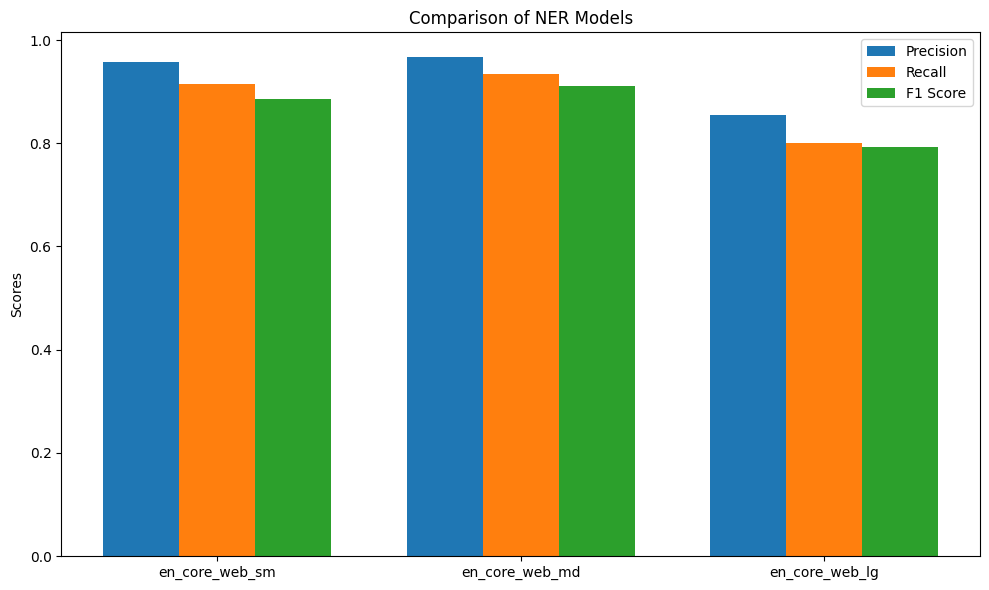

In [ ]:
import spacy
import json
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(nlp, evaluation_data_dir):
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for filename in os.listdir(evaluation_data_dir):
        if filename.endswith(".json"):
            file_path = os.path.join(evaluation_data_dir, filename)

            with open(file_path, "r", encoding="utf-8") as file:
                evaluation_data = json.load(file)

            predicted_entities_all_files = []
            expected_entities_all_files = []

            for example in evaluation_data["annotations"]:
                text = example[0]
                expected_entities = example[1]["entities"]

                doc = nlp(text)
                predicted_entities = [{"start": ent.start_char, "end": ent.end_char, "label": ent.label_} for ent in doc.ents]

                unique_expected_entities = set((ent[0], ent[1], ent[2]) for ent in expected_entities)

                entity_to_prediction = {}

                for predicted_entity in predicted_entities:
                    key = (predicted_entity["start"], predicted_entity["end"], predicted_entity["label"])
                    if key not in entity_to_prediction or (predicted_entity["start"] != -1 and entity_to_prediction[key]["start"] == -1):
                        entity_to_prediction[key] = predicted_entity

                for expected_entity in unique_expected_entities:
                    if expected_entity not in entity_to_prediction:
                        entity_to_prediction[expected_entity] = {"start": -1, "end": -1, "label": "NOT_PREDICTED"}

                predicted_entities_all_files.extend(list(entity_to_prediction.values()))
                expected_entities_all_files.extend(expected_entities)

            flat_predicted_entities = [ent["label"] for ent in predicted_entities_all_files if ent["label"] != "NOT_PREDICTED"]
            flat_expected_entities = [ent[2] for ent in expected_entities_all_files]

            if len(flat_predicted_entities) < len(flat_expected_entities):
                flat_predicted_entities += ["NOT_PREDICTED"] * (len(flat_expected_entities) - len(flat_predicted_entities))
            elif len(flat_predicted_entities) > len(flat_expected_entities):
                flat_expected_entities += ["NOT_PREDICTED"] * (len(flat_predicted_entities) - len(flat_expected_entities))

            precision = precision_score(flat_expected_entities, flat_predicted_entities, average="weighted", zero_division=1)
            recall = recall_score(flat_expected_entities, flat_predicted_entities, average="weighted")
            f1 = f1_score(flat_expected_entities, flat_predicted_entities, average="weighted")

            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)

    avg_precision = sum(precision_scores) / len(precision_scores) if precision_scores else 0
    avg_recall = sum(recall_scores) / len(recall_scores) if recall_scores else 0
    avg_f1 = sum(f1_scores) / len(f1_scores) if f1_scores else 0

    return avg_precision, avg_recall, avg_f1

# Specify the paths to the model directories
model_paths = {
    "en_core_web_sm": "/content/model_sm",
    "en_core_web_md": "/content/model_md",
    "en_core_web_lg": "/content/model_lg",
}

# Specify the directory containing your evaluation data files
evaluation_data_dir = "/content/data_set/test/entities"

# Evaluate each model
precision_scores = []
recall_scores = []
f1_scores = []

for model_name, model_path in model_paths.items():
    nlp = spacy.load(model_path)
    precision, recall, f1 = evaluate_model(nlp, evaluation_data_dir)

    # Print the metrics for each model
    print(f"Metrics for {model_name}:")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print("=" * 50)

    # Append metrics to lists for visualization
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Visualize the comparison using bar charts
labels = list(model_paths.keys())
precision_values = precision_scores
recall_values = recall_scores
f1_values = f1_scores

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision_values, width, label='Precision')
rects2 = ax.bar(x, recall_values, width, label='Recall')
rects3 = ax.bar(x + width, f1_values, width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('Comparison of NER Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


In [ ]:
import spacy
import json
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from spacy.training.example import Example

# Load your spaCy NER model (you can use a blank model if you don't have a pre-trained model)
nlp = spacy.load("en_core_web_sm")

# Specify the directory containing your training data files
training_data_dir = "/content/data_set/train/entities"

# Specify the directory containing your evaluation data files
evaluation_data_dir = "/content/data_set/test/entities"

def evaluate_model(nlp, evaluation_data_dir):
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for filename in os.listdir(evaluation_data_dir):
        if filename.endswith(".json"):
            file_path = os.path.join(evaluation_data_dir, filename)

            with open(file_path, "r", encoding="utf-8") as file:
                evaluation_data = json.load(file)

            predicted_entities_all_files = []
            expected_entities_all_files = []

            for example in evaluation_data["annotations"]:
                text = example[0]
                expected_entities = example[1]["entities"]

                doc = nlp(text)
                predicted_entities = [{"start": ent.start_char, "end": ent.end_char, "label": ent.label_} for ent in doc.ents]

                unique_expected_entities = set((ent[0], ent[1], ent[2]) for ent in expected_entities)

                entity_to_prediction = {}

                for predicted_entity in predicted_entities:
                    key = (predicted_entity["start"], predicted_entity["end"], predicted_entity["label"])
                    if key not in entity_to_prediction or (predicted_entity["start"] != -1 and entity_to_prediction[key]["start"] == -1):
                        entity_to_prediction[key] = predicted_entity

                for expected_entity in unique_expected_entities:
                    if expected_entity not in entity_to_prediction:
                        entity_to_prediction[expected_entity] = {"start": -1, "end": -1, "label": "NOT_PREDICTED"}

                predicted_entities_all_files.extend(list(entity_to_prediction.values()))
                expected_entities_all_files.extend(expected_entities)

            flat_predicted_entities = [ent["label"] for ent in predicted_entities_all_files if ent["label"] != "NOT_PREDICTED"]
            flat_expected_entities = [ent[2] for ent in expected_entities_all_files]

            if len(flat_predicted_entities) < len(flat_expected_entities):
                flat_predicted_entities += ["NOT_PREDICTED"] * (len(flat_expected_entities) - len(flat_predicted_entities))
            elif len(flat_predicted_entities) > len(flat_expected_entities):
                flat_expected_entities += ["NOT_PREDICTED"] * (len(flat_predicted_entities) - len(flat_expected_entities))

            precision = precision_score(flat_expected_entities, flat_predicted_entities, average="weighted", zero_division=1)
            recall = recall_score(flat_expected_entities, flat_predicted_entities, average="weighted")
            f1 = f1_score(flat_expected_entities, flat_predicted_entities, average="weighted")

            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)

    avg_precision = sum(precision_scores) / len(precision_scores) if precision_scores else 0
    avg_recall = sum(recall_scores) / len(recall_scores) if recall_scores else 0
    avg_f1 = sum(f1_scores) / len(f1_scores) if f1_scores else 0

    return avg_precision, avg_recall, avg_f1


# Initialize lists to store metrics for each epoch
epoch_list = []
precision_scores = []
recall_scores = []
f1_scores = []

# Training loop
epochs = 60
dropout_rate = 0.5

for epoch in range(epochs):
    all_losses = {}

    # Loop through each training file in the directory
    for filename in os.listdir(training_data_dir):
        if filename.endswith(".json"):
            file_path = os.path.join(training_data_dir, filename)

            # Load JSON file
            with open(file_path, "r", encoding="utf-8") as file:
                training_data = json.load(file)

            # Shuffle the list of annotations in the training data
            random.shuffle(training_data["annotations"])
            losses = {}

            # Process each example in the file
            for example in training_data["annotations"]:
                text = example[0]
                entities = example[1]["entities"]

                # Create a spaCy Doc object
                doc = nlp.make_doc(text)

                # Update the NER model with the example
                example = Example.from_dict(doc, {"entities": entities})
                nlp.update([example], drop=dropout_rate, losses=losses)

            # Print loss for each file
            avg_loss = losses.get("ner", 0.0)

            # Collect losses for all files
            all_losses.setdefault("ner", []).append(avg_loss)

    # Print average loss for the epoch
    avg_loss_all_files = sum(all_losses.get("ner", [])) / len(all_losses.get("ner", [])) if all_losses.get("ner") else 0
    print(f"Epoch {epoch + 1}, Avg. Loss (All Files): {avg_loss_all_files:.2f}")

    # Evaluate the model on your evaluation data
    precision, recall, f1 = evaluate_model(nlp, evaluation_data_dir)

    # Print or store the metrics for the current epoch
    print(f"\nEpoch: {epoch + 1}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    # Append metrics to the lists
    epoch_list.append(epoch + 1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)



Epoch 1, Avg. Loss (All Files): 11.38

Epoch: 1
Precision: 1.0000, Recall: 0.0000, F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

Epoch 2, Avg. Loss (All Files): 8.10

Epoch: 2
Precision: 0.9111, Recall: 0.0000, F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

Epoch 3, Avg. Loss (All Files): 9.40

Epoch: 3
Precision: 0.6852, Recall: 0.2222, F1 Score: 0.1741


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

Epoch 4, Avg. Loss (All Files): 10.74

Epoch: 4
Precision: 0.6926, Recall: 0.4444, F1 Score: 0.3704


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 5, Avg. Loss (All Files): 11.26


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 


Epoch: 5
Precision: 0.7333, Recall: 0.2000, F1 Score: 0.1852
Epoch 6, Avg. Loss (All Files): 6.53


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 6
Precision: 0.7296, Recall: 0.4667, F1 Score: 0.4000
Epoch 7, Avg. Loss (All Files): 15.92


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 7
Precision: 0.7481, Recall: 0.5111, F1 Score: 0.4407
Epoch 8, Avg. Loss (All Files): 5.04

Epoch: 8
Precision: 0.8519, Recall: 0.7333, F1 Score: 0.6630
Epoch 9, Avg. Loss (All Files): 4.60

Epoch: 9
Precision: 0.8741, Recall: 0.7556, F1 Score: 0.6852
Epoch 10, Avg. Loss (All Files): 4.11

Epoch: 10
Precision: 0.8074, Recall: 0.7111, F1 Score: 0.6556
Epoch 11, Avg. Loss (All Files): 4.36


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 11
Precision: 0.8519, Recall: 0.7333, F1 Score: 0.6778
Epoch 12, Avg. Loss (All Files): 3.51

Epoch: 12
Precision: 0.9185, Recall: 0.8222, F1 Score: 0.7667
Epoch 13, Avg. Loss (All Files): 3.20

Epoch: 13
Precision: 0.9185, Recall: 0.8222, F1 Score: 0.7667
Epoch 14, Avg. Loss (All Files): 3.27

Epoch: 14
Precision: 0.9185, Recall: 0.8222, F1 Score: 0.7667
Epoch 15, Avg. Loss (All Files): 4.75

Epoch: 15
Precision: 0.9185, Recall: 0.8222, F1 Score: 0.7667
Epoch 16, Avg. Loss (All Files): 3.05

Epoch: 16
Precision: 0.9352, Recall: 0.8704, F1 Score: 0.8272
Epoch 17, Avg. Loss (All Files): 3.53

Epoch: 17
Precision: 0.9074, Recall: 0.8000, F1 Score: 0.7370
Epoch 18, Avg. Loss (All Files): 2.97

Epoch: 18
Precision: 0.9463, Recall: 0.8926, F1 Score: 0.8568
Epoch 19, Avg. Loss (All Files): 2.24

Epoch: 19
Precision: 0.9444, Recall: 0.8889, F1 Score: 0.8519
Epoch 20, Avg. Loss (All Files): 1.95

Epoch: 20
Precision: 0.9667, Recall: 0.9333, F1 Score: 0.9111
Epoch 21, Avg. Loss (All Fil

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 33, Avg. Loss (All Files): 0.44

Epoch: 33
Precision: 0.8889, Recall: 0.8444, F1 Score: 0.8296


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 34, Avg. Loss (All Files): 0.73

Epoch: 34
Precision: 0.9778, Recall: 0.9556, F1 Score: 0.9407
Epoch 35, Avg. Loss (All Files): 1.06

Epoch: 35
Precision: 0.9778, Recall: 0.9556, F1 Score: 0.9407
Epoch 36, Avg. Loss (All Files): 0.85

Epoch: 36
Precision: 0.9667, Recall: 0.9333, F1 Score: 0.9111
Epoch 37, Avg. Loss (All Files): 0.44

Epoch: 37
Precision: 0.9667, Recall: 0.9333, F1 Score: 0.9111
Epoch 38, Avg. Loss (All Files): 0.47

Epoch: 38
Precision: 0.9667, Recall: 0.9333, F1 Score: 0.9111
Epoch 39, Avg. Loss (All Files): 0.54

Epoch: 39
Precision: 0.9667, Recall: 0.9333, F1 Score: 0.9111
Epoch 40, Avg. Loss (All Files): 0.53

Epoch: 40
Precision: 0.9667, Recall: 0.9333, F1 Score: 0.9111
Epoch 41, Avg. Loss (All Files): 0.39

Epoch: 41
Precision: 0.9481, Recall: 0.8963, F1 Score: 0.8617
Epoch 42, Avg. Loss (All Files): 0.59

Epoch: 42
Precision: 0.9667, Recall: 0.9333, F1 Score: 0.9111
Epoch 43, Avg. Loss (All Files): 0.38

Epoch: 43
Precision: 0.9667, Recall: 0.9333, F1 Scor

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 46, Avg. Loss (All Files): 0.27

Epoch: 46
Precision: 0.8889, Recall: 0.8444, F1 Score: 0.8296


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 47, Avg. Loss (All Files): 0.47

Epoch: 47
Precision: 0.8889, Recall: 0.8444, F1 Score: 0.8296


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 48, Avg. Loss (All Files): 0.39

Epoch: 48
Precision: 0.8889, Recall: 0.8444, F1 Score: 0.8296


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 49, Avg. Loss (All Files): 0.21


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 49
Precision: 0.8889, Recall: 0.8444, F1 Score: 0.8296
Epoch 50, Avg. Loss (All Files): 0.57

Epoch: 50
Precision: 0.9667, Recall: 0.9333, F1 Score: 0.9111
Epoch 51, Avg. Loss (All Files): 0.59


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 51
Precision: 0.8889, Recall: 0.8444, F1 Score: 0.8296
Epoch 52, Avg. Loss (All Files): 0.36

Epoch: 52
Precision: 0.8889, Recall: 0.8444, F1 Score: 0.8296


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 53, Avg. Loss (All Files): 0.47

Epoch: 53
Precision: 0.8889, Recall: 0.8444, F1 Score: 0.8296


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 54, Avg. Loss (All Files): 0.61

Epoch: 54
Precision: 0.8889, Recall: 0.8444, F1 Score: 0.8296


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 55, Avg. Loss (All Files): 0.49

Epoch: 55
Precision: 0.9667, Recall: 0.9333, F1 Score: 0.9111
Epoch 56, Avg. Loss (All Files): 0.68

Epoch: 56
Precision: 0.9667, Recall: 0.9333, F1 Score: 0.9111
Epoch 57, Avg. Loss (All Files): 0.34


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 57
Precision: 0.8889, Recall: 0.8444, F1 Score: 0.8296
Epoch 58, Avg. Loss (All Files): 0.06


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 58
Precision: 0.8889, Recall: 0.8444, F1 Score: 0.8296
Epoch 59, Avg. Loss (All Files): 0.43

Epoch: 59
Precision: 0.8889, Recall: 0.8444, F1 Score: 0.8296


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 60, Avg. Loss (All Files): 0.69

Epoch: 60
Precision: 0.9667, Recall: 0.9333, F1 Score: 0.9111


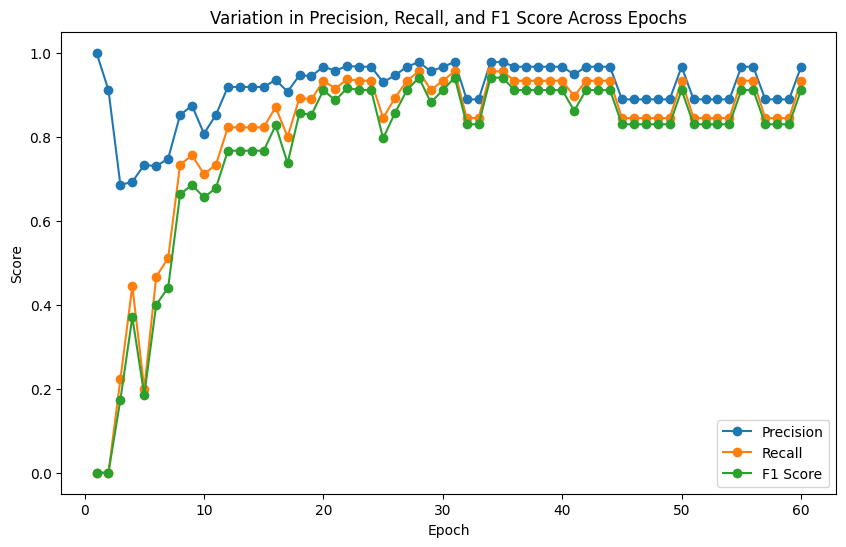

In [ ]:
# Visualize the curves
plt.figure(figsize=(10, 6))

# Plot precision curve
plt.plot(epoch_list, precision_scores, label='Precision', marker='o')

# Plot recall curve
plt.plot(epoch_list, recall_scores, label='Recall', marker='o')

# Plot F1 score curve
plt.plot(epoch_list, f1_scores, label='F1 Score', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Variation in Precision, Recall, and F1 Score Across Epochs')
plt.legend()
plt.show()

In [ ]:
import spacy
import json
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from spacy.training.example import Example

# Load your spaCy NER model (you can use a blank model if you don't have a pre-trained model)
nlp = spacy.load("en_core_web_md")

# Specify the directory containing your training data files
training_data_dir = "/content/data_set/train/entities"

# Specify the directory containing your evaluation data files
evaluation_data_dir = "/content/data_set/test/entities"

def evaluate_model(nlp, evaluation_data_dir):
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for filename in os.listdir(evaluation_data_dir):
        if filename.endswith(".json"):
            file_path = os.path.join(evaluation_data_dir, filename)

            with open(file_path, "r", encoding="utf-8") as file:
                evaluation_data = json.load(file)

            predicted_entities_all_files = []
            expected_entities_all_files = []

            for example in evaluation_data["annotations"]:
                text = example[0]
                expected_entities = example[1]["entities"]

                doc = nlp(text)
                predicted_entities = [{"start": ent.start_char, "end": ent.end_char, "label": ent.label_} for ent in doc.ents]

                unique_expected_entities = set((ent[0], ent[1], ent[2]) for ent in expected_entities)

                entity_to_prediction = {}

                for predicted_entity in predicted_entities:
                    key = (predicted_entity["start"], predicted_entity["end"], predicted_entity["label"])
                    if key not in entity_to_prediction or (predicted_entity["start"] != -1 and entity_to_prediction[key]["start"] == -1):
                        entity_to_prediction[key] = predicted_entity

                for expected_entity in unique_expected_entities:
                    if expected_entity not in entity_to_prediction:
                        entity_to_prediction[expected_entity] = {"start": -1, "end": -1, "label": "NOT_PREDICTED"}

                predicted_entities_all_files.extend(list(entity_to_prediction.values()))
                expected_entities_all_files.extend(expected_entities)

            flat_predicted_entities = [ent["label"] for ent in predicted_entities_all_files if ent["label"] != "NOT_PREDICTED"]
            flat_expected_entities = [ent[2] for ent in expected_entities_all_files]

            if len(flat_predicted_entities) < len(flat_expected_entities):
                flat_predicted_entities += ["NOT_PREDICTED"] * (len(flat_expected_entities) - len(flat_predicted_entities))
            elif len(flat_predicted_entities) > len(flat_expected_entities):
                flat_expected_entities += ["NOT_PREDICTED"] * (len(flat_predicted_entities) - len(flat_expected_entities))

            precision = precision_score(flat_expected_entities, flat_predicted_entities, average="weighted", zero_division=1)
            recall = recall_score(flat_expected_entities, flat_predicted_entities, average="weighted")
            f1 = f1_score(flat_expected_entities, flat_predicted_entities, average="weighted")

            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)

    avg_precision = sum(precision_scores) / len(precision_scores) if precision_scores else 0
    avg_recall = sum(recall_scores) / len(recall_scores) if recall_scores else 0
    avg_f1 = sum(f1_scores) / len(f1_scores) if f1_scores else 0

    return avg_precision, avg_recall, avg_f1


# Initialize lists to store metrics for each epoch
epoch_list = []
precision_scores = []
recall_scores = []
f1_scores = []

# Training loop
epochs = 60
dropout_rate = 0.5

for epoch in range(epochs):
    all_losses = {}

    # Loop through each training file in the directory
    for filename in os.listdir(training_data_dir):
        if filename.endswith(".json"):
            file_path = os.path.join(training_data_dir, filename)

            # Load JSON file
            with open(file_path, "r", encoding="utf-8") as file:
                training_data = json.load(file)

            # Shuffle the list of annotations in the training data
            random.shuffle(training_data["annotations"])
            losses = {}

            # Process each example in the file
            for example in training_data["annotations"]:
                text = example[0]
                entities = example[1]["entities"]

                # Create a spaCy Doc object
                doc = nlp.make_doc(text)

                # Update the NER model with the example
                example = Example.from_dict(doc, {"entities": entities})
                nlp.update([example], drop=dropout_rate, losses=losses)

            # Print loss for each file
            avg_loss = losses.get("ner", 0.0)

            # Collect losses for all files
            all_losses.setdefault("ner", []).append(avg_loss)

    # Print average loss for the epoch
    avg_loss_all_files = sum(all_losses.get("ner", [])) / len(all_losses.get("ner", [])) if all_losses.get("ner") else 0
    print(f"Epoch {epoch + 1}, Avg. Loss (All Files): {avg_loss_all_files:.2f}")

    # Evaluate the model on your evaluation data
    precision, recall, f1 = evaluate_model(nlp, evaluation_data_dir)

    # Print or store the metrics for the current epoch
    print(f"\nEpoch: {epoch + 1}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    # Append metrics to the lists
    epoch_list.append(epoch + 1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)



Epoch 1, Avg. Loss (All Files): 10.48

Epoch: 1
Precision: 1.0000, Recall: 0.0000, F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

Epoch 2, Avg. Loss (All Files): 7.13

Epoch: 2
Precision: 0.8111, Recall: 0.1111, F1 Score: 0.0889


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

Epoch 3, Avg. Loss (All Files): 14.73


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 3
Precision: 0.7741, Recall: 0.4889, F1 Score: 0.4556
Epoch 4, Avg. Loss (All Files): 9.25

Epoch: 4
Precision: 0.8481, Recall: 0.6000, F1 Score: 0.5037
Epoch 5, Avg. Loss (All Files): 5.01

Epoch: 5
Precision: 0.8704, Recall: 0.6222, F1 Score: 0.5259
Epoch 6, Avg. Loss (All Files): 18.08

Epoch: 6
Precision: 0.8481, Recall: 0.6000, F1 Score: 0.5037
Epoch 7, Avg. Loss (All Files): 35.44

Epoch: 7
Precision: 0.8556, Recall: 0.2000, F1 Score: 0.1778


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

Epoch 8, Avg. Loss (All Files): 7.43

Epoch: 8
Precision: 0.7333, Recall: 0.4667, F1 Score: 0.4037


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

Epoch 9, Avg. Loss (All Files): 6.95

Epoch: 9
Precision: 0.8741, Recall: 0.6444, F1 Score: 0.5519
Epoch 10, Avg. Loss (All Files): 4.58

Epoch: 10
Precision: 0.8704, Recall: 0.7333, F1 Score: 0.6593
Epoch 11, Avg. Loss (All Files): 3.56


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 11
Precision: 0.9074, Recall: 0.8000, F1 Score: 0.7519
Epoch 12, Avg. Loss (All Files): 3.65

Epoch: 12
Precision: 0.9000, Recall: 0.8222, F1 Score: 0.7704
Epoch 13, Avg. Loss (All Files): 3.01

Epoch: 13
Precision: 0.8407, Recall: 0.7111, F1 Score: 0.6481


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 14, Avg. Loss (All Files): 3.25

Epoch: 14
Precision: 0.9333, Recall: 0.8667, F1 Score: 0.8222
Epoch 15, Avg. Loss (All Files): 2.96

Epoch: 15
Precision: 0.9296, Recall: 0.8444, F1 Score: 0.7963
Epoch 16, Avg. Loss (All Files): 2.54

Epoch: 16
Precision: 0.8963, Recall: 0.7778, F1 Score: 0.7074
Epoch 17, Avg. Loss (All Files): 2.70

Epoch: 17
Precision: 0.9444, Recall: 0.8889, F1 Score: 0.8519
Epoch 18, Avg. Loss (All Files): 2.33

Epoch: 18
Precision: 0.9667, Recall: 0.9333, F1 Score: 0.9111
Epoch 19, Avg. Loss (All Files): 1.54

Epoch: 19
Precision: 0.9444, Recall: 0.8889, F1 Score: 0.8519
Epoch 20, Avg. Loss (All Files): 2.26

Epoch: 20
Precision: 0.9352, Recall: 0.8704, F1 Score: 0.8272
Epoch 21, Avg. Loss (All Files): 1.96

Epoch: 21
Precision: 0.9444, Recall: 0.8889, F1 Score: 0.8519
Epoch 22, Avg. Loss (All Files): 1.81

Epoch: 22
Precision: 0.9444, Recall: 0.8889, F1 Score: 0.8519
Epoch 23, Avg. Loss (All Files): 1.21

Epoch: 23
Precision: 0.9778, Recall: 0.9556, F1 Scor

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 41
Precision: 0.9111, Recall: 0.8444, F1 Score: 0.8148
Epoch 42, Avg. Loss (All Files): 0.08

Epoch: 42
Precision: 0.9574, Recall: 0.9148, F1 Score: 0.8864
Epoch 43, Avg. Loss (All Files): 0.36

Epoch: 43
Precision: 0.9778, Recall: 0.9556, F1 Score: 0.9407
Epoch 44, Avg. Loss (All Files): 0.21

Epoch: 44
Precision: 0.9352, Recall: 0.8704, F1 Score: 0.8568


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 45, Avg. Loss (All Files): 0.41

Epoch: 45
Precision: 0.9556, Recall: 0.9111, F1 Score: 0.8815
Epoch 46, Avg. Loss (All Files): 0.31

Epoch: 46
Precision: 0.9241, Recall: 0.8704, F1 Score: 0.8494


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 47, Avg. Loss (All Files): 0.26

Epoch: 47
Precision: 0.9685, Recall: 0.9370, F1 Score: 0.9160
Epoch 48, Avg. Loss (All Files): 0.17


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 48
Precision: 0.9241, Recall: 0.8704, F1 Score: 0.8494
Epoch 49, Avg. Loss (All Files): 0.33


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 49
Precision: 0.9444, Recall: 0.9111, F1 Score: 0.9037
Epoch 50, Avg. Loss (All Files): 0.27

Epoch: 50
Precision: 0.9778, Recall: 0.9556, F1 Score: 0.9407
Epoch 51, Avg. Loss (All Files): 0.43

Epoch: 51
Precision: 0.9778, Recall: 0.9556, F1 Score: 0.9407
Epoch 52, Avg. Loss (All Files): 0.26

Epoch: 52
Precision: 0.9667, Recall: 0.9333, F1 Score: 0.9111
Epoch 53, Avg. Loss (All Files): 0.37

Epoch: 53
Precision: 0.9778, Recall: 0.9556, F1 Score: 0.9407
Epoch 54, Avg. Loss (All Files): 0.34

Epoch: 54
Precision: 0.9444, Recall: 0.9111, F1 Score: 0.9037


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 55, Avg. Loss (All Files): 0.29

Epoch: 55
Precision: 0.9778, Recall: 0.9556, F1 Score: 0.9407
Epoch 56, Avg. Loss (All Files): 0.20


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 56
Precision: 0.9333, Recall: 0.8889, F1 Score: 0.8741
Epoch 57, Avg. Loss (All Files): 0.18


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 57
Precision: 0.9222, Recall: 0.8667, F1 Score: 0.8444
Epoch 58, Avg. Loss (All Files): 0.10

Epoch: 58
Precision: 0.9685, Recall: 0.9370, F1 Score: 0.9160
Epoch 59, Avg. Loss (All Files): 0.27

Epoch: 59
Precision: 0.9463, Recall: 0.9148, F1 Score: 0.9086


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 60, Avg. Loss (All Files): 0.35

Epoch: 60
Precision: 0.9556, Recall: 0.9333, F1 Score: 0.9333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


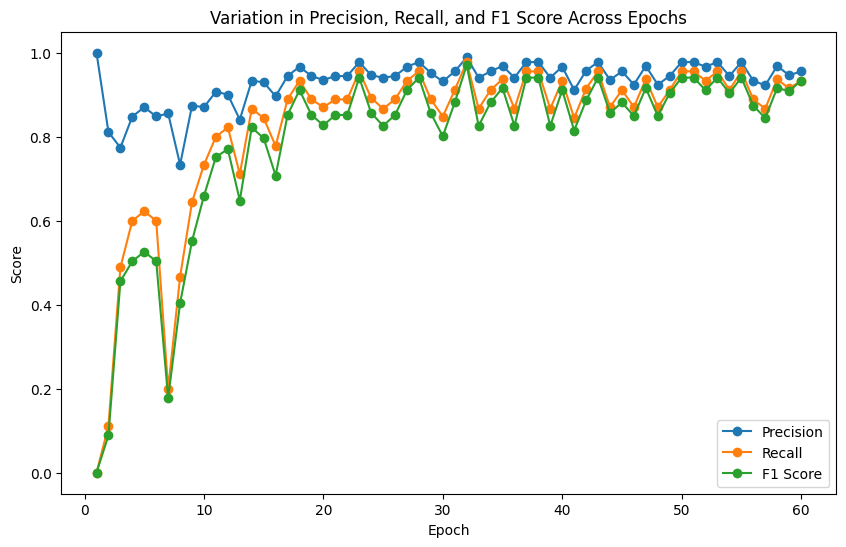

In [ ]:
# Visualize the curves
plt.figure(figsize=(10, 6))

# Plot precision curve
plt.plot(epoch_list, precision_scores, label='Precision', marker='o')

# Plot recall curve
plt.plot(epoch_list, recall_scores, label='Recall', marker='o')

# Plot F1 score curve
plt.plot(epoch_list, f1_scores, label='F1 Score', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Variation in Precision, Recall, and F1 Score Across Epochs')
plt.legend()
plt.show()


In [ ]:
import spacy
import json
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from spacy.training.example import Example

# Load your spaCy NER model (you can use a blank model if you don't have a pre-trained model)
nlp = spacy.load("en_core_web_lg")

# Specify the directory containing your training data files
training_data_dir = "/content/data_set/train/entities"

# Specify the directory containing your evaluation data files
evaluation_data_dir = "/content/data_set/test/entities"

def evaluate_model(nlp, evaluation_data_dir):
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for filename in os.listdir(evaluation_data_dir):
        if filename.endswith(".json"):
            file_path = os.path.join(evaluation_data_dir, filename)

            with open(file_path, "r", encoding="utf-8") as file:
                evaluation_data = json.load(file)

            predicted_entities_all_files = []
            expected_entities_all_files = []

            for example in evaluation_data["annotations"]:
                text = example[0]
                expected_entities = example[1]["entities"]

                doc = nlp(text)
                predicted_entities = [{"start": ent.start_char, "end": ent.end_char, "label": ent.label_} for ent in doc.ents]

                unique_expected_entities = set((ent[0], ent[1], ent[2]) for ent in expected_entities)

                entity_to_prediction = {}

                for predicted_entity in predicted_entities:
                    key = (predicted_entity["start"], predicted_entity["end"], predicted_entity["label"])
                    if key not in entity_to_prediction or (predicted_entity["start"] != -1 and entity_to_prediction[key]["start"] == -1):
                        entity_to_prediction[key] = predicted_entity

                for expected_entity in unique_expected_entities:
                    if expected_entity not in entity_to_prediction:
                        entity_to_prediction[expected_entity] = {"start": -1, "end": -1, "label": "NOT_PREDICTED"}

                predicted_entities_all_files.extend(list(entity_to_prediction.values()))
                expected_entities_all_files.extend(expected_entities)

            flat_predicted_entities = [ent["label"] for ent in predicted_entities_all_files if ent["label"] != "NOT_PREDICTED"]
            flat_expected_entities = [ent[2] for ent in expected_entities_all_files]

            if len(flat_predicted_entities) < len(flat_expected_entities):
                flat_predicted_entities += ["NOT_PREDICTED"] * (len(flat_expected_entities) - len(flat_predicted_entities))
            elif len(flat_predicted_entities) > len(flat_expected_entities):
                flat_expected_entities += ["NOT_PREDICTED"] * (len(flat_predicted_entities) - len(flat_expected_entities))

            precision = precision_score(flat_expected_entities, flat_predicted_entities, average="weighted", zero_division=1)
            recall = recall_score(flat_expected_entities, flat_predicted_entities, average="weighted")
            f1 = f1_score(flat_expected_entities, flat_predicted_entities, average="weighted")

            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)

    avg_precision = sum(precision_scores) / len(precision_scores) if precision_scores else 0
    avg_recall = sum(recall_scores) / len(recall_scores) if recall_scores else 0
    avg_f1 = sum(f1_scores) / len(f1_scores) if f1_scores else 0

    return avg_precision, avg_recall, avg_f1


# Initialize lists to store metrics for each epoch
epoch_list = []
precision_scores = []
recall_scores = []
f1_scores = []

# Training loop
epochs = 60
dropout_rate = 0.5

for epoch in range(epochs):
    all_losses = {}

    # Loop through each training file in the directory
    for filename in os.listdir(training_data_dir):
        if filename.endswith(".json"):
            file_path = os.path.join(training_data_dir, filename)

            # Load JSON file
            with open(file_path, "r", encoding="utf-8") as file:
                training_data = json.load(file)

            # Shuffle the list of annotations in the training data
            random.shuffle(training_data["annotations"])
            losses = {}

            # Process each example in the file
            for example in training_data["annotations"]:
                text = example[0]
                entities = example[1]["entities"]

                # Create a spaCy Doc object
                doc = nlp.make_doc(text)

                # Update the NER model with the example
                example = Example.from_dict(doc, {"entities": entities})
                nlp.update([example], drop=dropout_rate, losses=losses)

            # Print loss for each file
            avg_loss = losses.get("ner", 0.0)

            # Collect losses for all files
            all_losses.setdefault("ner", []).append(avg_loss)

    # Print average loss for the epoch
    avg_loss_all_files = sum(all_losses.get("ner", [])) / len(all_losses.get("ner", [])) if all_losses.get("ner") else 0
    print(f"Epoch {epoch + 1}, Avg. Loss (All Files): {avg_loss_all_files:.2f}")

    # Evaluate the model on your evaluation data
    precision, recall, f1 = evaluate_model(nlp, evaluation_data_dir)

    # Print or store the metrics for the current epoch
    print(f"\nEpoch: {epoch + 1}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    # Append metrics to the lists
    epoch_list.append(epoch + 1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)



Epoch 1, Avg. Loss (All Files): 10.22


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 


Epoch: 1
Precision: 1.0000, Recall: 0.0000, F1 Score: 0.0000
Epoch 2, Avg. Loss (All Files): 7.36


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 


Epoch: 2
Precision: 0.7556, Recall: 0.0000, F1 Score: 0.0000
Epoch 3, Avg. Loss (All Files): 12.92

Epoch: 3
Precision: 0.6728, Recall: 0.3222, F1 Score: 0.2759


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

Epoch 4, Avg. Loss (All Files): 10.63

Epoch: 4
Precision: 0.6704, Recall: 0.4000, F1 Score: 0.3556


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

Epoch 5, Avg. Loss (All Files): 10.22

Epoch: 5
Precision: 0.7519, Recall: 0.5111, F1 Score: 0.4444


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 6, Avg. Loss (All Files): 5.25

Epoch: 6
Precision: 0.6654, Recall: 0.4074, F1 Score: 0.3574


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 7, Avg. Loss (All Files): 9.39

Epoch: 7
Precision: 0.6296, Recall: 0.2222, F1 Score: 0.1815


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

Epoch 8, Avg. Loss (All Files): 7.48


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 8
Precision: 0.6725, Recall: 0.3365, F1 Score: 0.2926
Epoch 9, Avg. Loss (All Files): 6.13


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 9
Precision: 0.7296, Recall: 0.5778, F1 Score: 0.5148
Epoch 10, Avg. Loss (All Files): 4.82


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 10
Precision: 0.7630, Recall: 0.5778, F1 Score: 0.5222
Epoch 11, Avg. Loss (All Files): 4.30

Epoch: 11
Precision: 0.8204, Recall: 0.6926, F1 Score: 0.6309


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 12, Avg. Loss (All Files): 3.27

Epoch: 12
Precision: 0.8759, Recall: 0.7593, F1 Score: 0.6901
Epoch 13, Avg. Loss (All Files): 3.33

Epoch: 13
Precision: 0.7889, Recall: 0.6444, F1 Score: 0.5926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 14, Avg. Loss (All Files): 3.39

Epoch: 14
Precision: 0.8444, Recall: 0.7333, F1 Score: 0.6889


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 15, Avg. Loss (All Files): 3.70

Epoch: 15
Precision: 0.8222, Recall: 0.6889, F1 Score: 0.6296


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 16, Avg. Loss (All Files): 2.70


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 16
Precision: 0.8185, Recall: 0.6889, F1 Score: 0.6259
Epoch 17, Avg. Loss (All Files): 5.81


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 17
Precision: 0.8222, Recall: 0.6889, F1 Score: 0.6296
Epoch 18, Avg. Loss (All Files): 3.38

Epoch: 18
Precision: 0.8222, Recall: 0.7333, F1 Score: 0.7037


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 19, Avg. Loss (All Files): 3.12

Epoch: 19
Precision: 0.9000, Recall: 0.8222, F1 Score: 0.7852


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 20, Avg. Loss (All Files): 2.93

Epoch: 20
Precision: 0.8407, Recall: 0.7111, F1 Score: 0.6630


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 21, Avg. Loss (All Files): 2.40

Epoch: 21
Precision: 0.8000, Recall: 0.6667, F1 Score: 0.6222


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 22, Avg. Loss (All Files): 1.85

Epoch: 22
Precision: 0.8296, Recall: 0.7333, F1 Score: 0.7074


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 23, Avg. Loss (All Files): 1.06

Epoch: 23
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 24, Avg. Loss (All Files): 1.08


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 24
Precision: 0.8333, Recall: 0.7556, F1 Score: 0.7333
Epoch 25, Avg. Loss (All Files): 1.30


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 25
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926
Epoch 26, Avg. Loss (All Files): 0.67

Epoch: 26
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 27, Avg. Loss (All Files): 0.98

Epoch: 27
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 28, Avg. Loss (All Files): 1.20

Epoch: 28
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 29, Avg. Loss (All Files): 0.94

Epoch: 29
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 30, Avg. Loss (All Files): 0.94

Epoch: 30
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 31, Avg. Loss (All Files): 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 31
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926
Epoch 32, Avg. Loss (All Files): 0.65


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 32
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926
Epoch 33, Avg. Loss (All Files): 0.39

Epoch: 33
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 34, Avg. Loss (All Files): 0.12

Epoch: 34
Precision: 0.8444, Recall: 0.7556, F1 Score: 0.7407


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 35, Avg. Loss (All Files): 0.53

Epoch: 35
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 36, Avg. Loss (All Files): 0.40

Epoch: 36
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 37, Avg. Loss (All Files): 0.30

Epoch: 37
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 38, Avg. Loss (All Files): 0.31


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 38
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926
Epoch 39, Avg. Loss (All Files): 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 39
Precision: 0.8444, Recall: 0.7778, F1 Score: 0.7630
Epoch 40, Avg. Loss (All Files): 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 40
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926
Epoch 41, Avg. Loss (All Files): 0.52

Epoch: 41
Precision: 0.8444, Recall: 0.7778, F1 Score: 0.7630


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 42, Avg. Loss (All Files): 0.35

Epoch: 42
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 43, Avg. Loss (All Files): 0.48

Epoch: 43
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 44, Avg. Loss (All Files): 0.44

Epoch: 44
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 45, Avg. Loss (All Files): 0.14

Epoch: 45
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 46, Avg. Loss (All Files): 0.44


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 46
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926
Epoch 47, Avg. Loss (All Files): 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 47
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926
Epoch 48, Avg. Loss (All Files): 0.02


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 48
Precision: 0.8889, Recall: 0.8444, F1 Score: 0.8296
Epoch 49, Avg. Loss (All Files): 0.10

Epoch: 49
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 50, Avg. Loss (All Files): 0.26

Epoch: 50
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 51, Avg. Loss (All Files): 0.23

Epoch: 51
Precision: 0.8889, Recall: 0.8444, F1 Score: 0.8296


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 52, Avg. Loss (All Files): 0.55

Epoch: 52
Precision: 0.9000, Recall: 0.8667, F1 Score: 0.8593


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 53, Avg. Loss (All Files): 0.18

Epoch: 53
Precision: 0.9000, Recall: 0.8667, F1 Score: 0.8593


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 54, Avg. Loss (All Files): 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 54
Precision: 0.9000, Recall: 0.8667, F1 Score: 0.8593
Epoch 55, Avg. Loss (All Files): 0.23


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch: 55
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926
Epoch 56, Avg. Loss (All Files): 0.09

Epoch: 56
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 57, Avg. Loss (All Files): 0.16

Epoch: 57
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 58, Avg. Loss (All Files): 0.38

Epoch: 58
Precision: 0.8556, Recall: 0.8000, F1 Score: 0.7926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 59, Avg. Loss (All Files): 0.09

Epoch: 59
Precision: 0.9000, Recall: 0.8667, F1 Score: 0.8593


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 60, Avg. Loss (All Files): 0.08

Epoch: 60
Precision: 0.9000, Recall: 0.8667, F1 Score: 0.8593


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


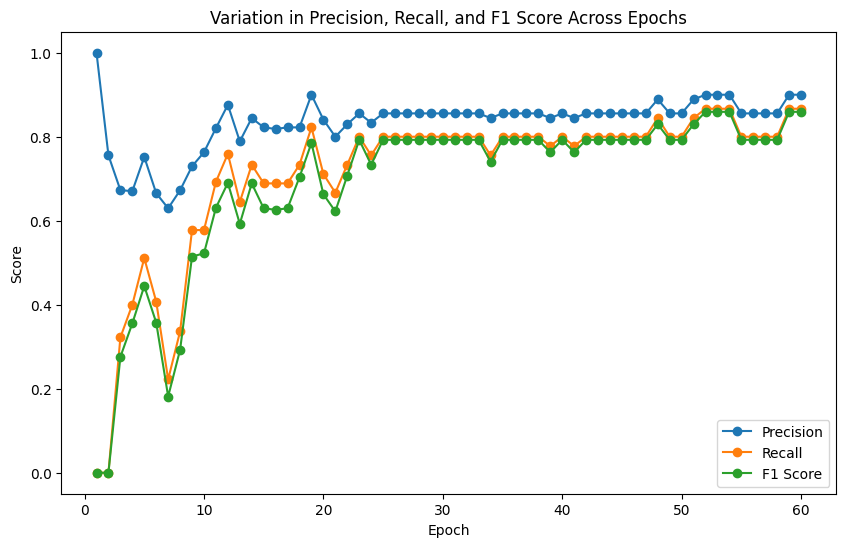

In [ ]:
# Visualize the curves
plt.figure(figsize=(10, 6))

# Plot precision curve
plt.plot(epoch_list, precision_scores, label='Precision', marker='o')

# Plot recall curve
plt.plot(epoch_list, recall_scores, label='Recall', marker='o')

# Plot F1 score curve
plt.plot(epoch_list, f1_scores, label='F1 Score', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Variation in Precision, Recall, and F1 Score Across Epochs')
plt.legend()
plt.show()
